<div style="background-color:#6C6CE4; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> Table of Contents </div>
<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
1. Data Preprocessing<br>
2. Feature Engineering<br>
3. Exploratory Data Analysis<br>
4. Model Selection<br>
5. Hyperparameter tuning <br>
6. Feature Importances<br>
7. Model Interpretation.<br>
8. Recommendations<br>
9. Generating submission.
</div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Importing modules </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from mlxtend.classifier import StackingCVClassifier
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import shap


/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Reading the dataframes </div>

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Checking the columns </div>

In [3]:
train_df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
1. Data Preprocessing </div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Dropping unneccessary columns </div>

In [4]:
train_df.drop(['id', 'Product ID'], axis=1, inplace=True)
test_df.drop(['id', 'Product ID'], axis=1, inplace=True)


<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Checking the contents of the dataframe </div>

In [5]:
train_df

Type  Air temperature [K]  Process temperature [K]  \
0         L                300.6                    309.6   
1         M                302.6                    312.1   
2         L                299.3                    308.5   
3         L                301.0                    310.9   
4         M                298.0                    309.0   
...     ...                  ...                      ...   
136424    M                300.1                    311.4   
136425    H                297.5                    308.5   
136426    L                300.5                    311.8   
136427    L                301.7                    310.9   
136428    L                296.9                    308.1   

        Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                         1596         36.1              140                0   
1                         1759         29.1              200                0   
2                         1805         26.5               25                0   
3                         1524         44.3              197                0   
4                         1641         35.4               34                0   
...                        ...          ...              ...              ...   
136424                    1530         37.5              210                0   
136425                    1447         49.1                2                0   
136426                    1524         38.5              214                0   
136427                    1447         46.3               42                0   
136428                    1557         39.3              229                0   

        TWF  HDF  PWF  OSF  RNF  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
136424    0    0    0    0    0  
136425    0    0    0    0    0  
136426    0    0    0    0    0  
136427    0    0    0    0    0  
136428    0    0    0    0    0  

[136429 rows x 12 columns]

<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
2. Feature Engineering </div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Creating new features like Temperature difference & Speed_Torque </div>

In [6]:
train_df['Temperature Difference'] = train_df['Process temperature [K]'] - train_df['Air temperature [K]']
test_df['Temperature Difference'] = test_df['Process temperature [K]'] - test_df['Air temperature [K]']


In [7]:
train_df['Speed_Torque'] = train_df['Rotational speed [rpm]'] * train_df['Torque [Nm]']
test_df['Speed_Torque'] = test_df['Rotational speed [rpm]'] * test_df['Torque [Nm]']


<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Seperating the target variable from the features </div>

In [8]:
X = train_df.drop(['Machine failure'], axis=1)
y = train_df['Machine failure']


<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
3. Exploratory Data Analysis </div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Selecting the column for analysis </div>

In [9]:
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
           'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type', 'Temperature Difference', 'Speed_Torque']


<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Subset the data based on the selected columns </div>

In [10]:
subset_df = train_df[columns]

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying summary statistics </div>

In [11]:
summary_stats = subset_df.describe()
print(summary_stats)


       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count        136429.000000            136429.000000           136429.000000   
mean            299.862776               309.941070             1520.331110   
std               1.862247                 1.385173              138.736632   
min             295.300000               305.800000             1181.000000   
25%             298.300000               308.700000             1432.000000   
50%             300.000000               310.000000             1493.000000   
75%             301.200000               310.900000             1580.000000   
max             304.400000               313.800000             2886.000000   

         Torque [Nm]  Tool wear [min]  Machine failure            TWF  \
count  136429.000000    136429.000000    136429.000000  136429.000000   
mean       40.348643       104.408901         0.015744       0.001554   
std         8.502229        63.965040         0.124486       0.039389

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Plotting distribution plots </div>

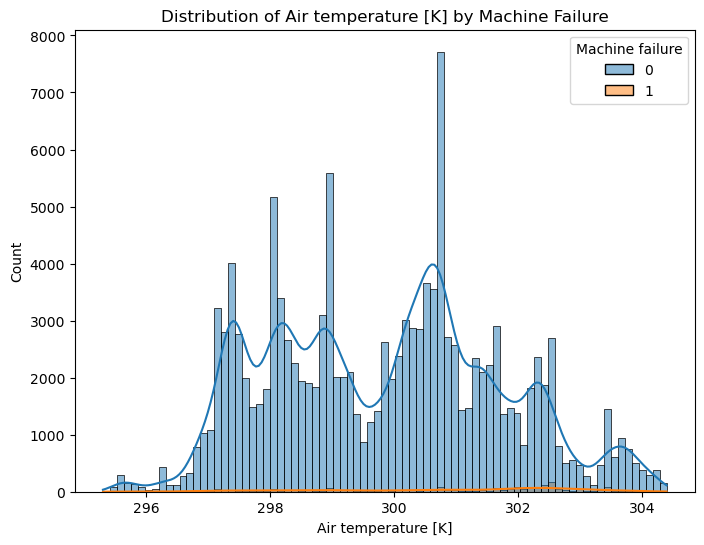

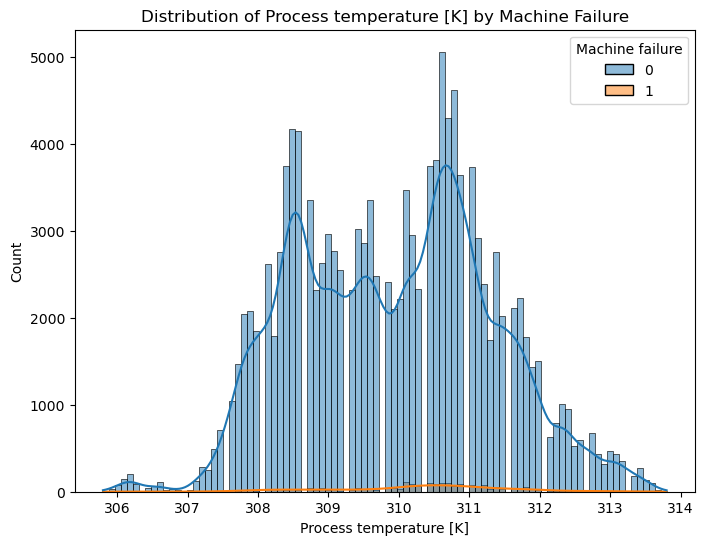

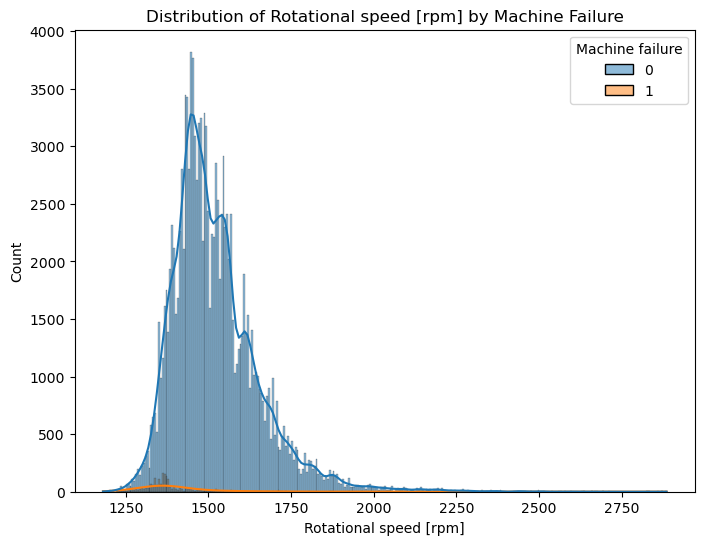

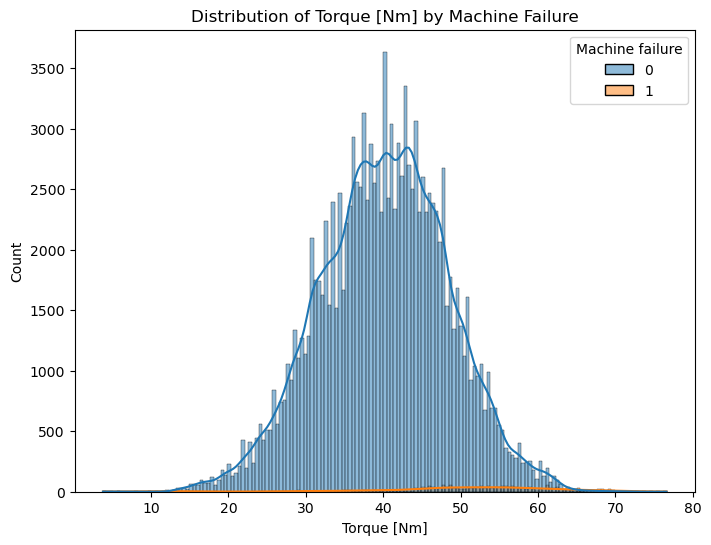

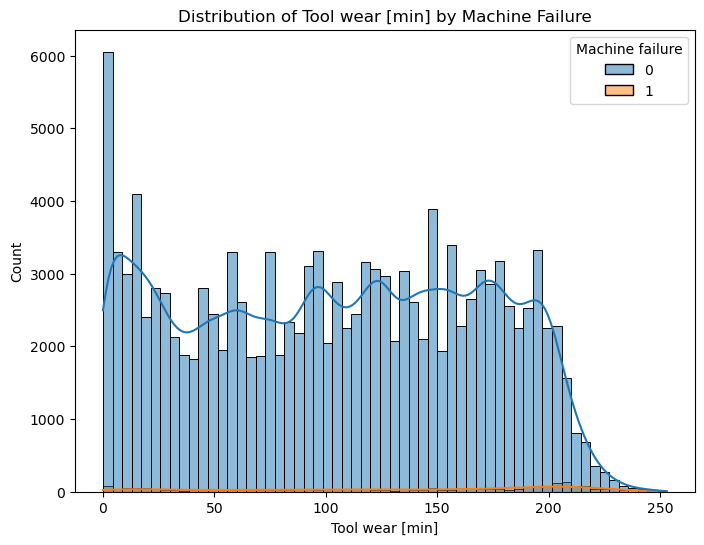

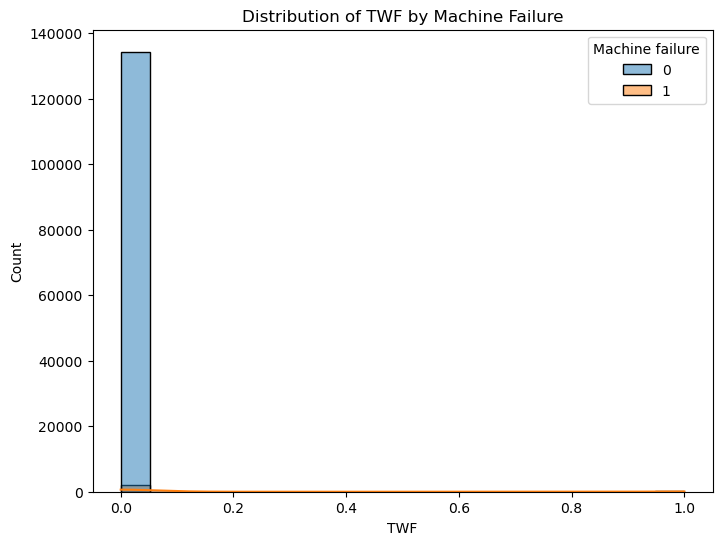

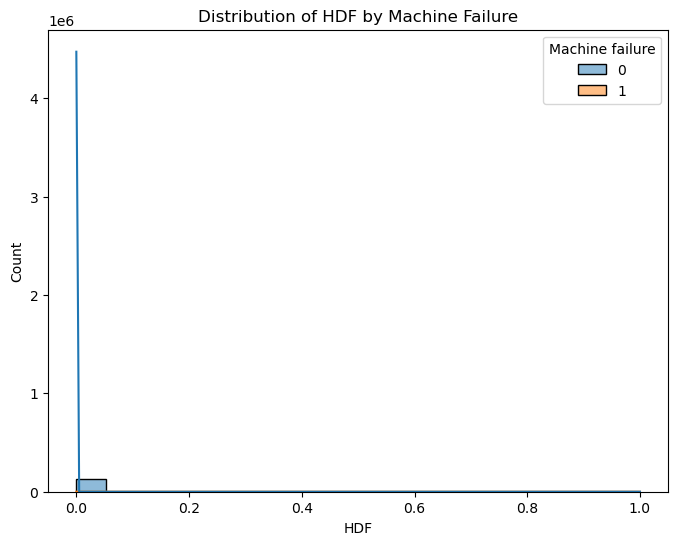

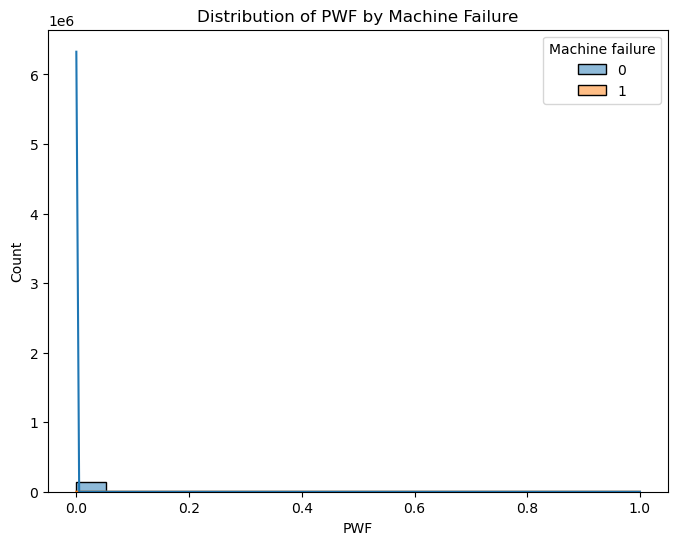

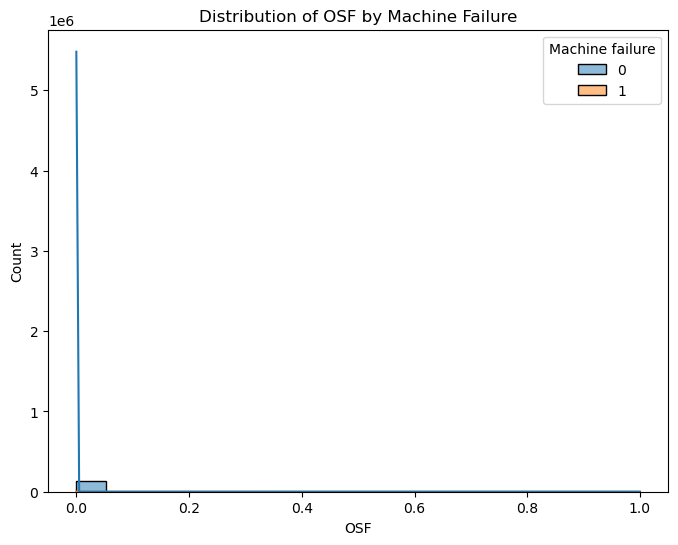

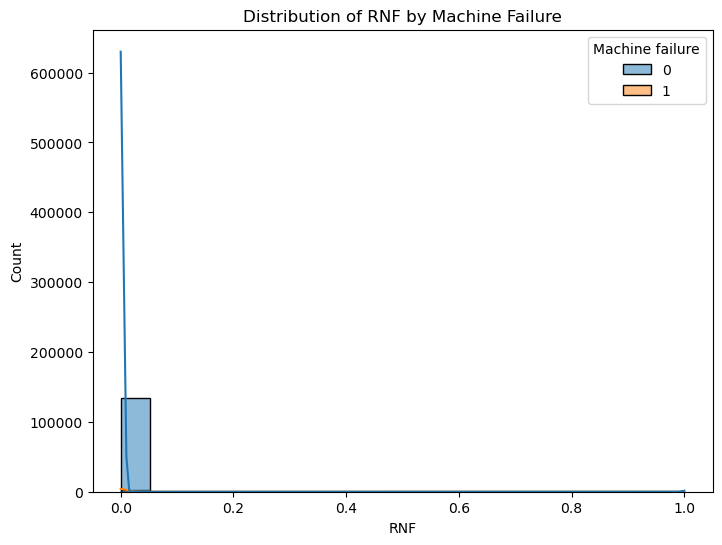

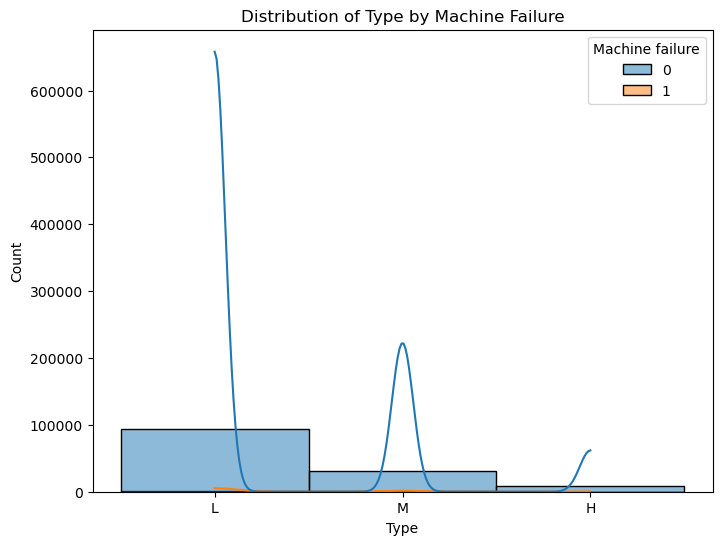

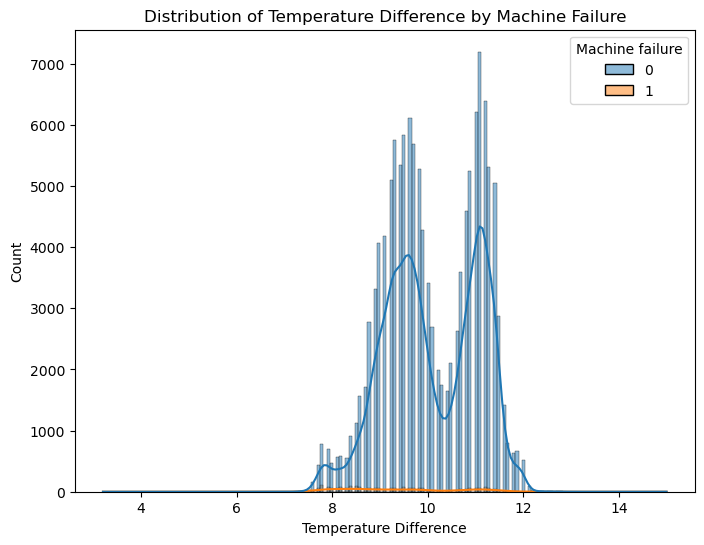

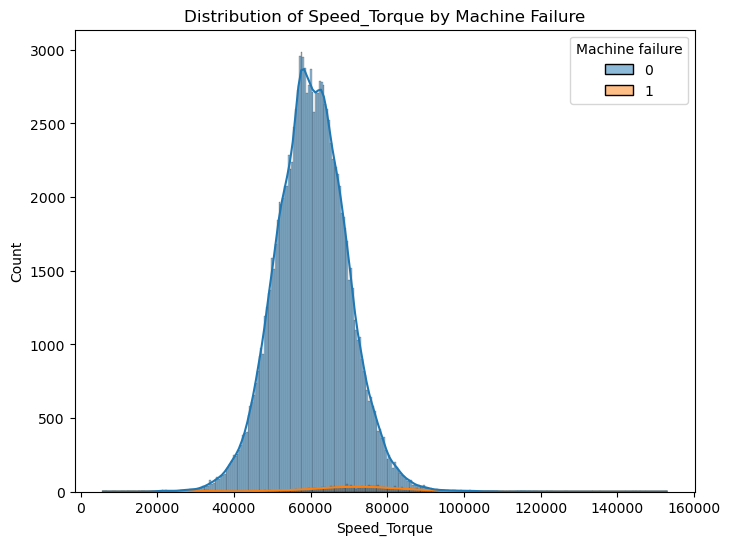

In [12]:
for column in subset_df.columns:
    if column != 'Machine failure':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=subset_df, x=column, hue='Machine failure', kde=True)
        plt.title(f'Distribution of {column} by Machine Failure')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying correlation matrix </div>


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


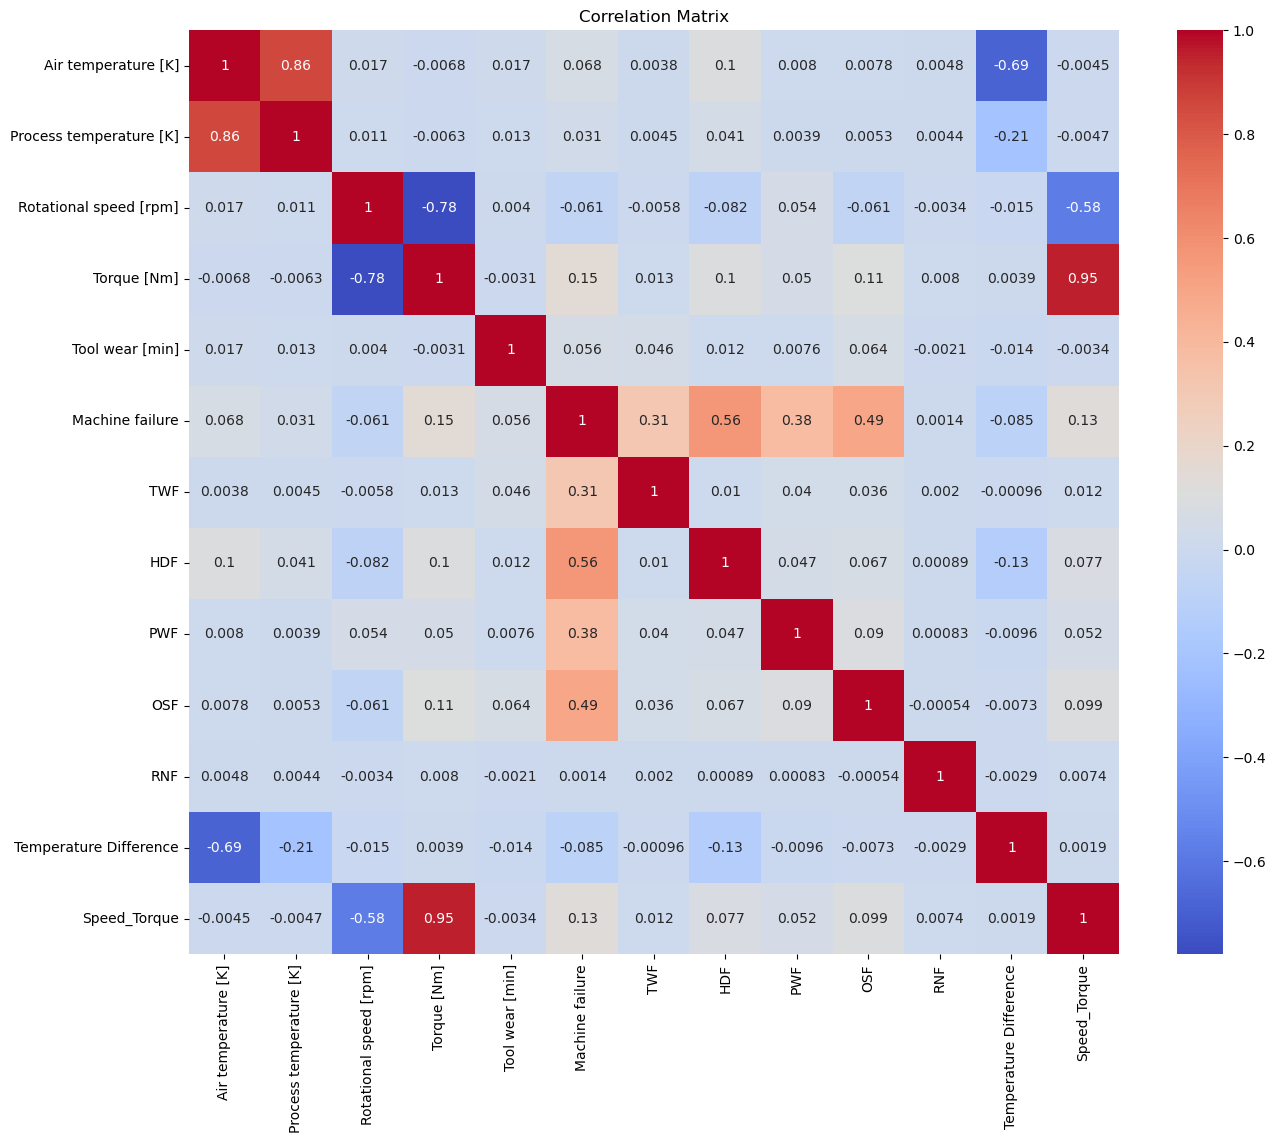

In [13]:
corr_matrix = subset_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying scatter plots </div>

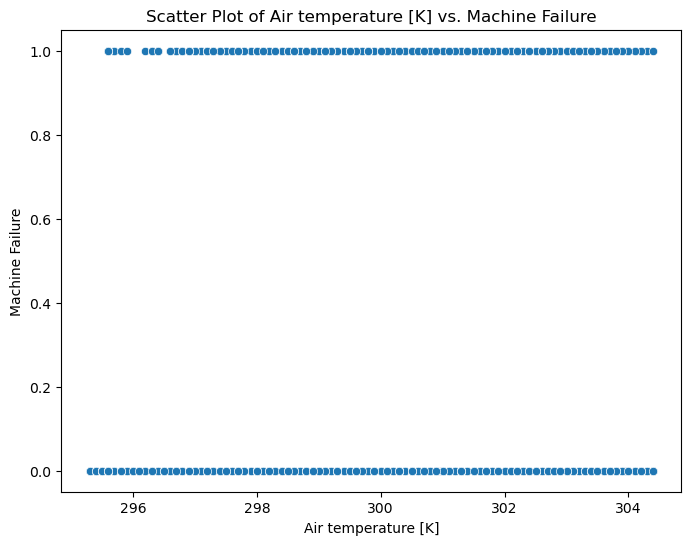

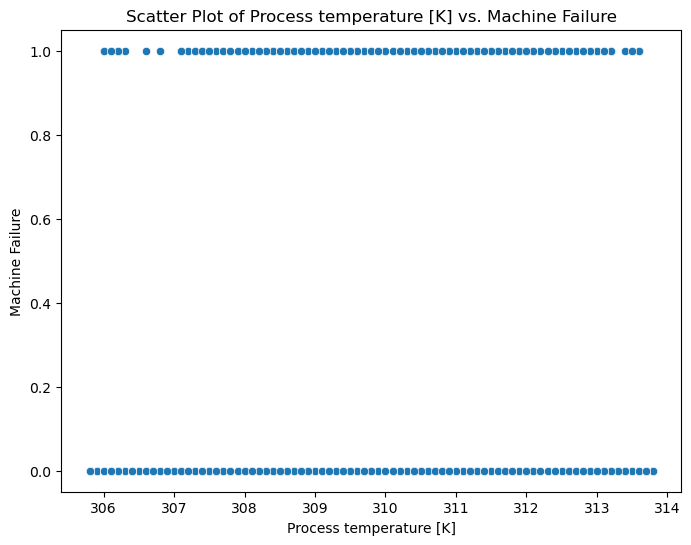

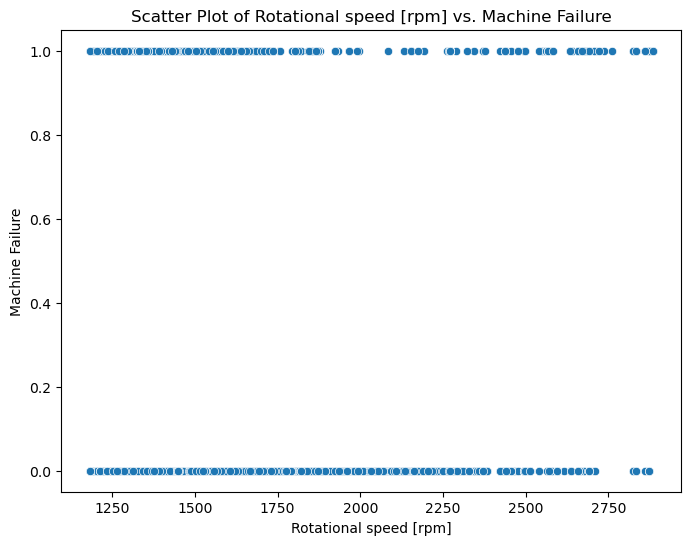

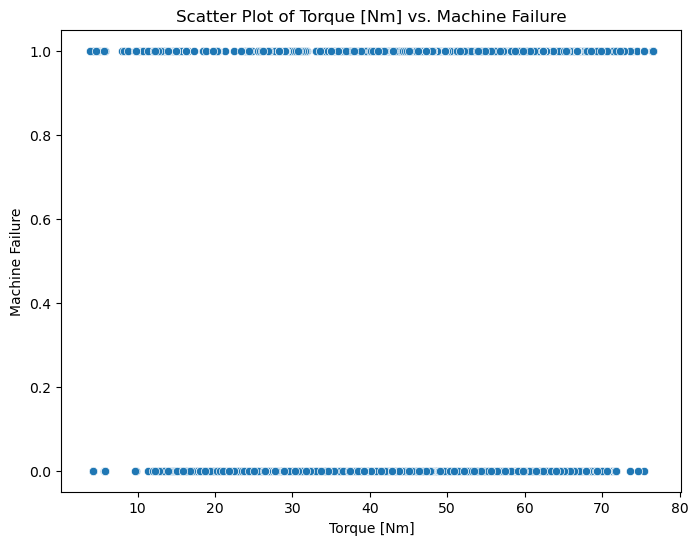

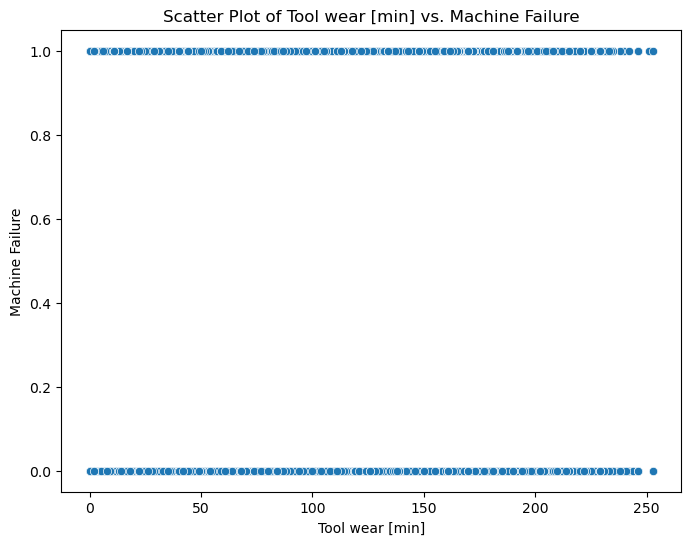

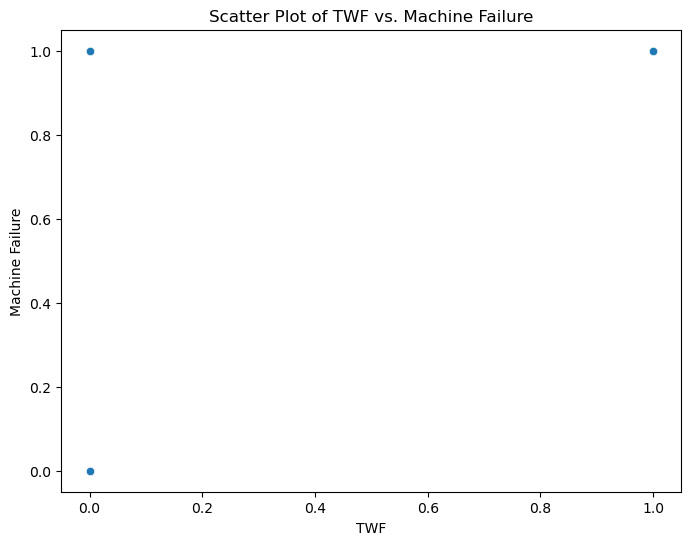

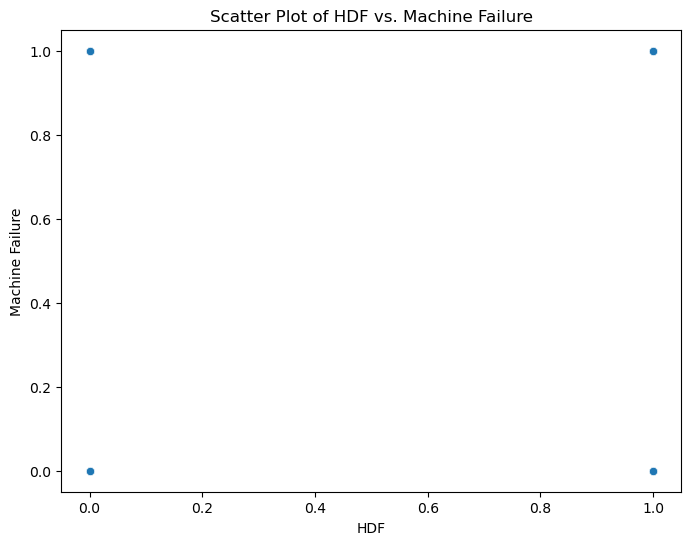

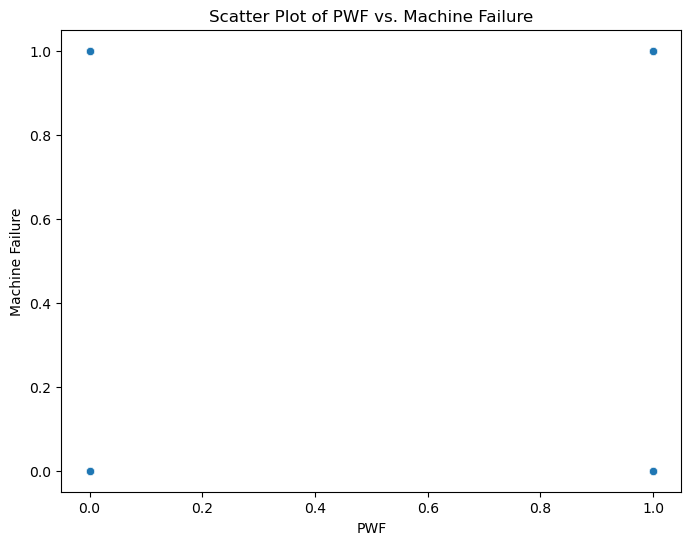

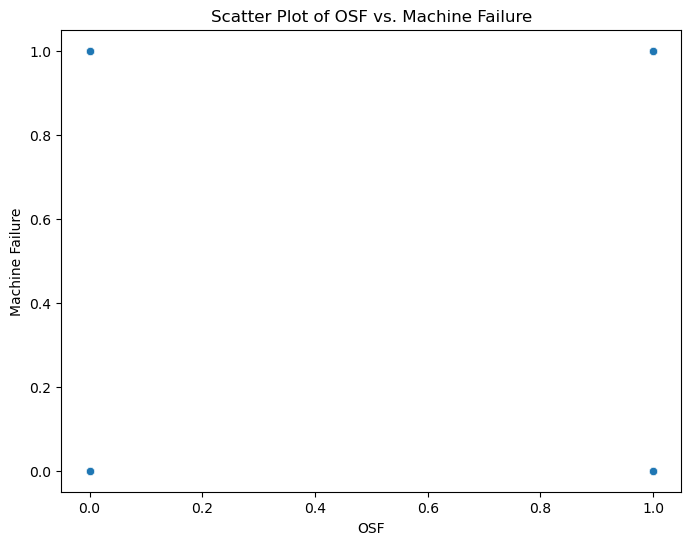

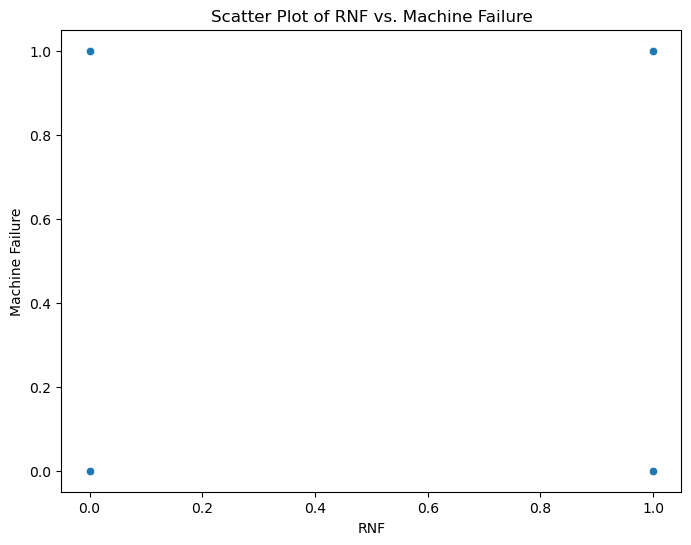

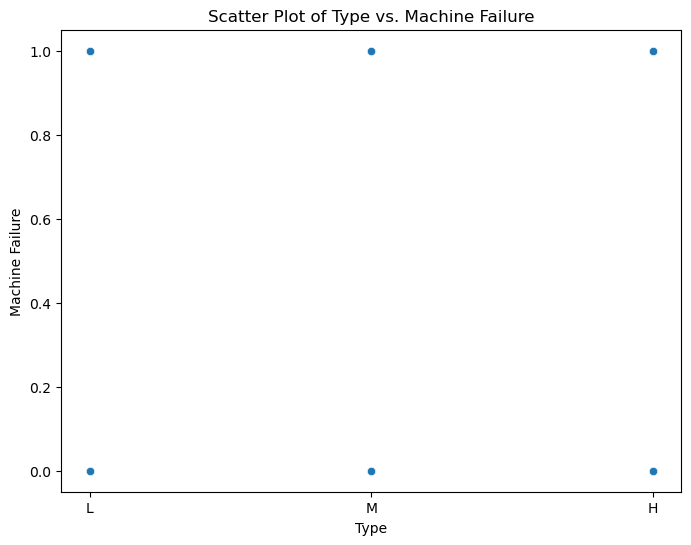

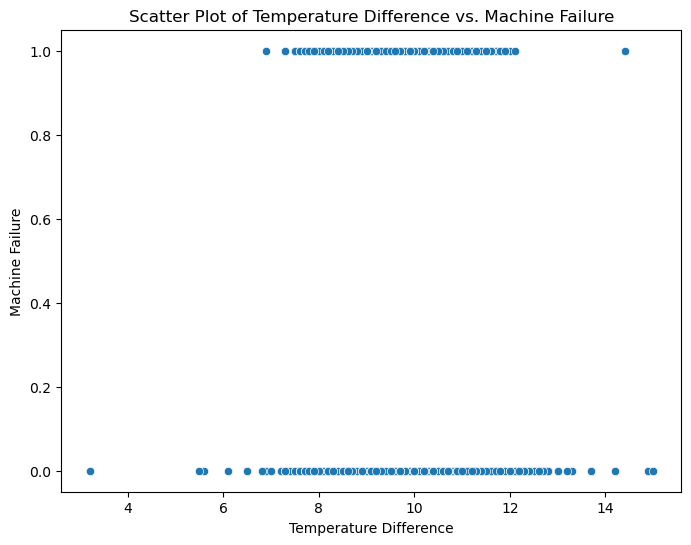

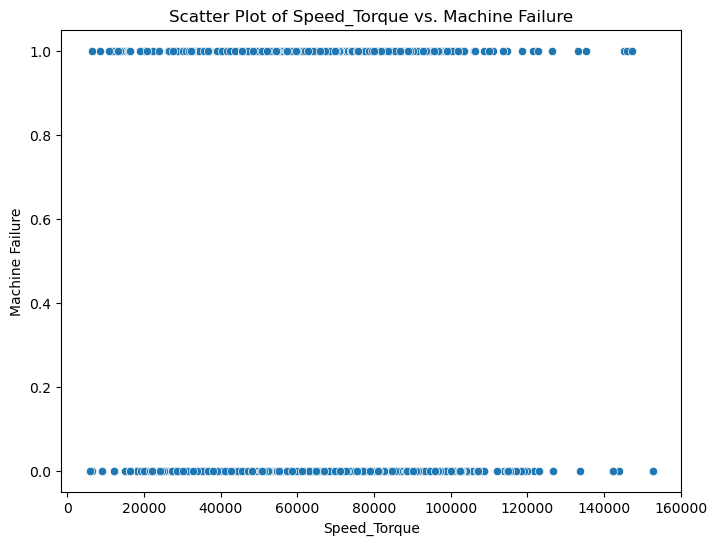

In [14]:
for column in subset_df.columns:
    if column != 'Machine failure':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=subset_df, x=column, y='Machine failure')
        plt.title(f'Scatter Plot of {column} vs. Machine Failure')
        plt.xlabel(column)
        plt.ylabel('Machine Failure')
        plt.show()

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying boxplots to get insights on outliers </div>

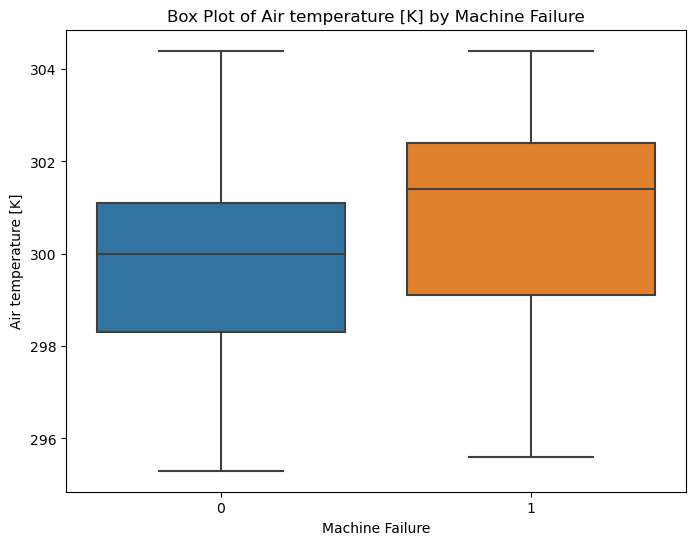

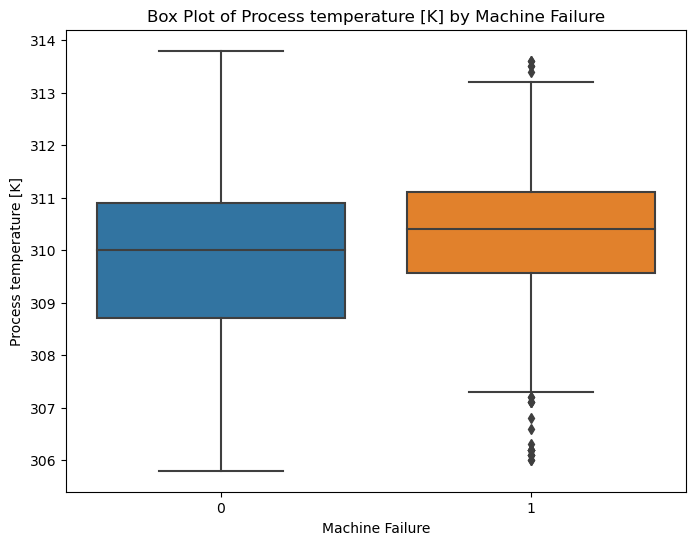

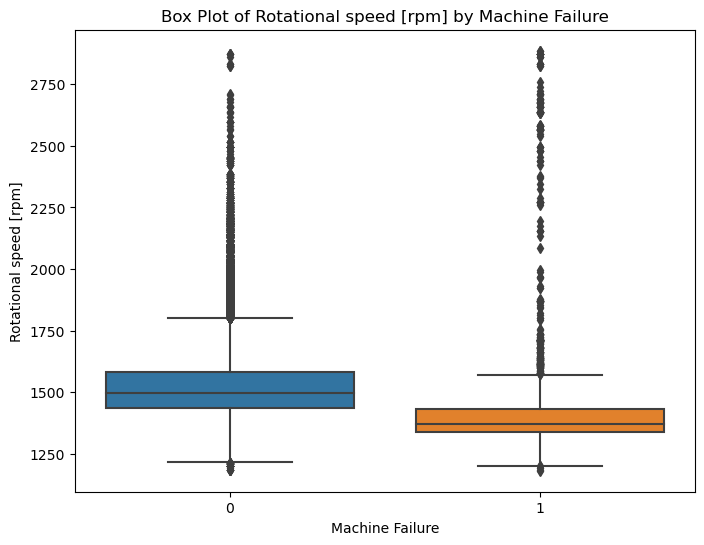

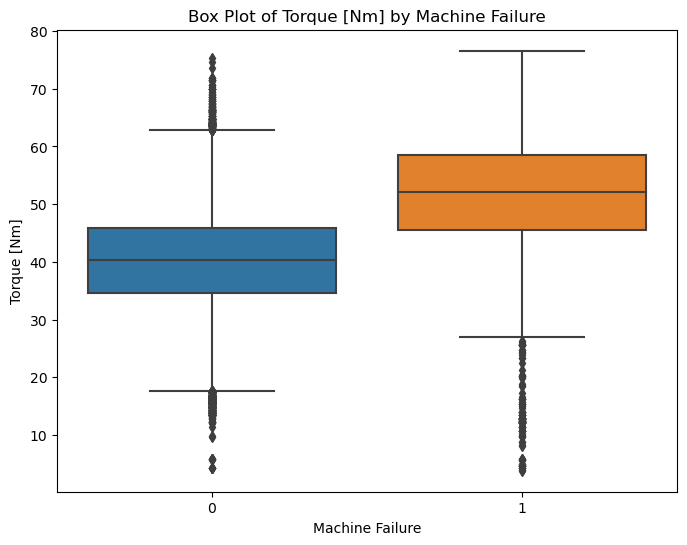

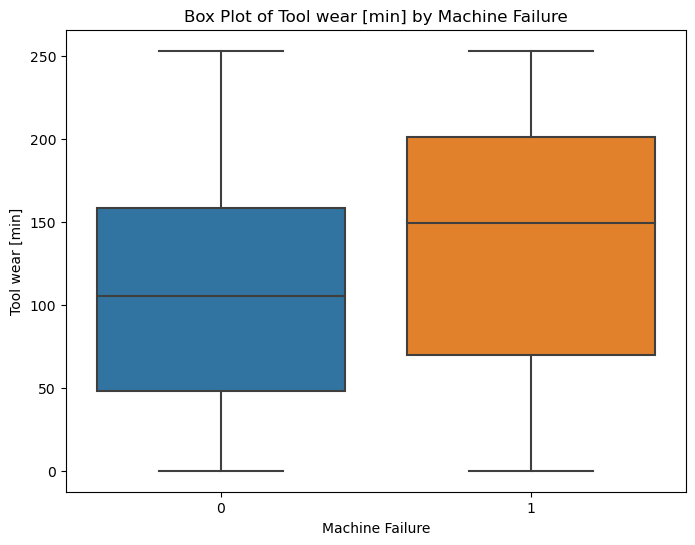

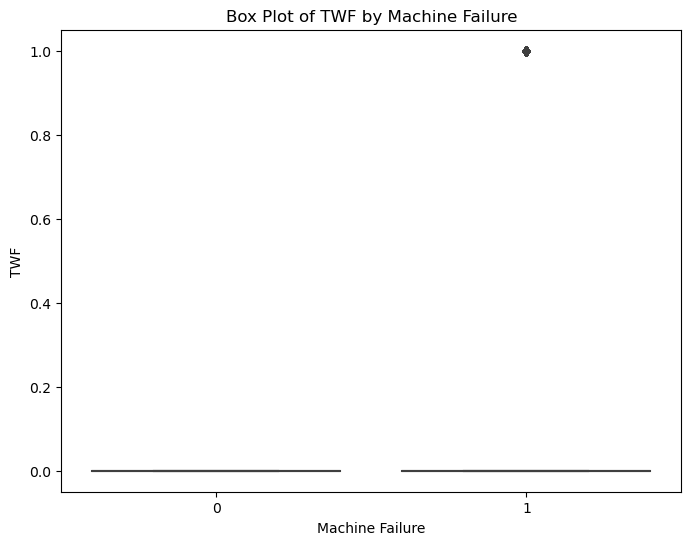

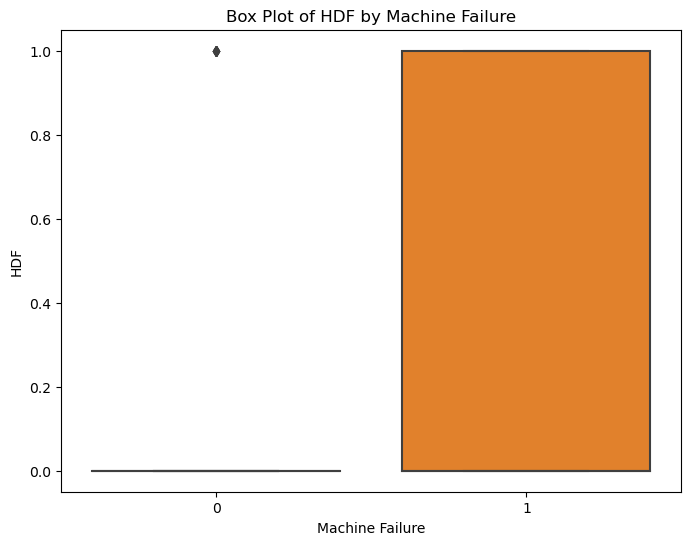

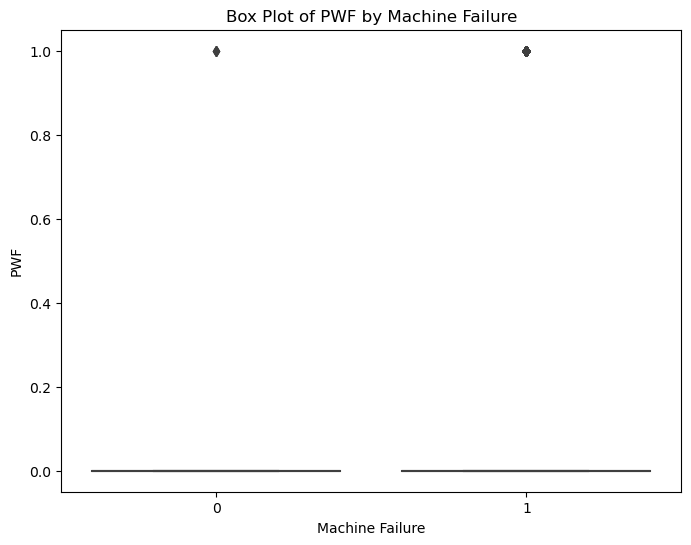

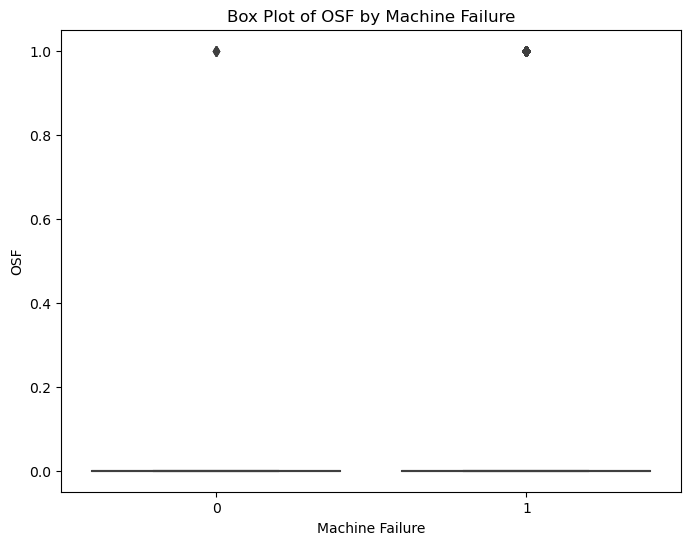

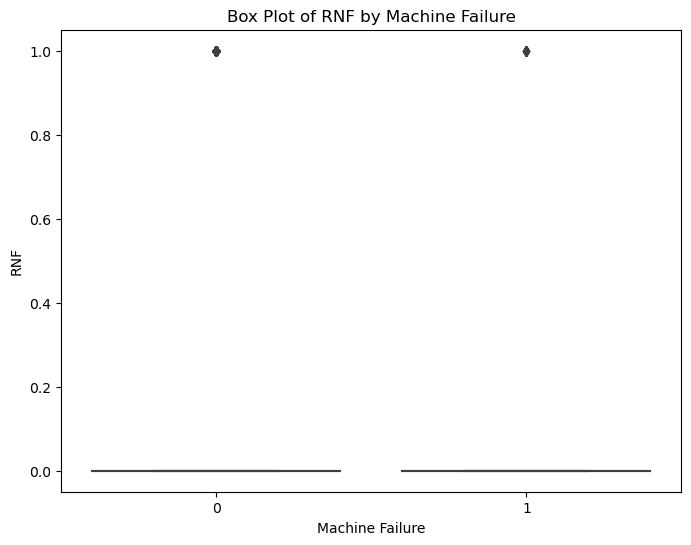

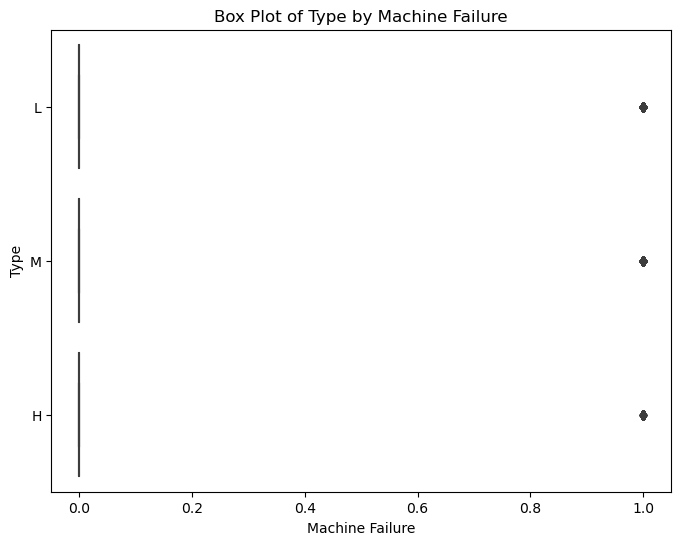

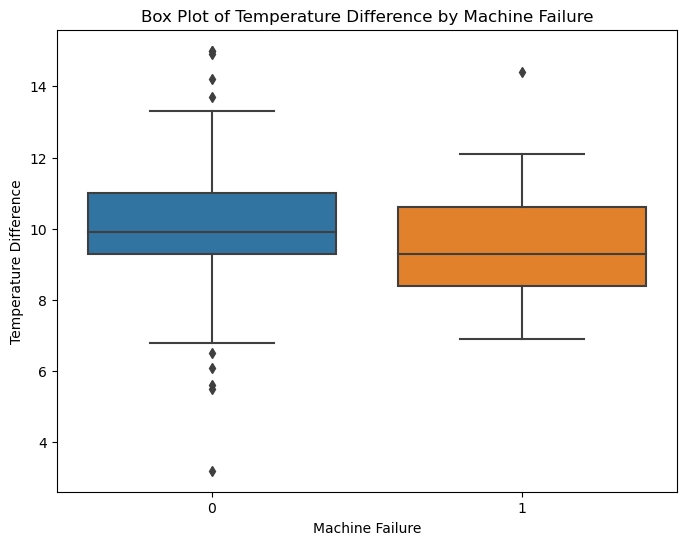

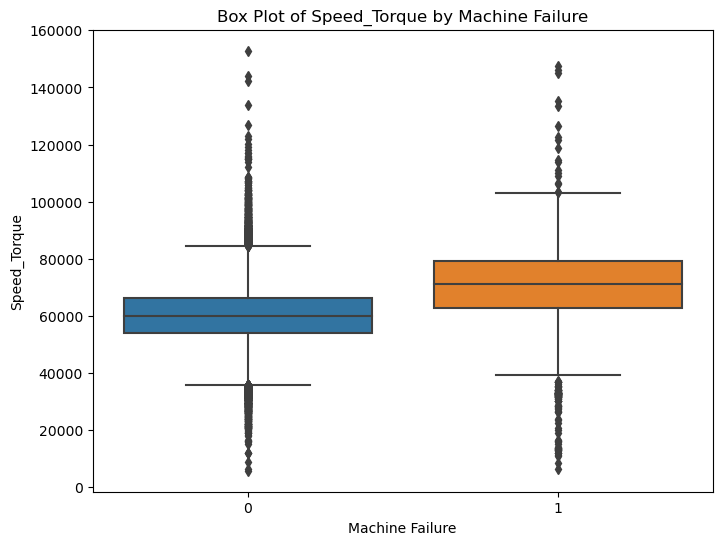

In [15]:
for column in subset_df.columns:
    if column != 'Machine failure':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=subset_df, x='Machine failure', y=column)
        plt.title(f'Box Plot of {column} by Machine Failure')
        plt.xlabel('Machine Failure')
        plt.ylabel(column)
        plt.show()

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying countplots of categorical variables </div>

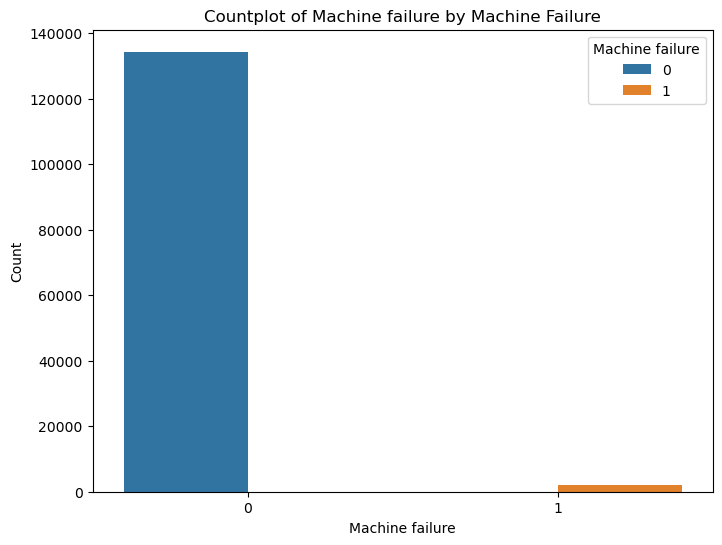

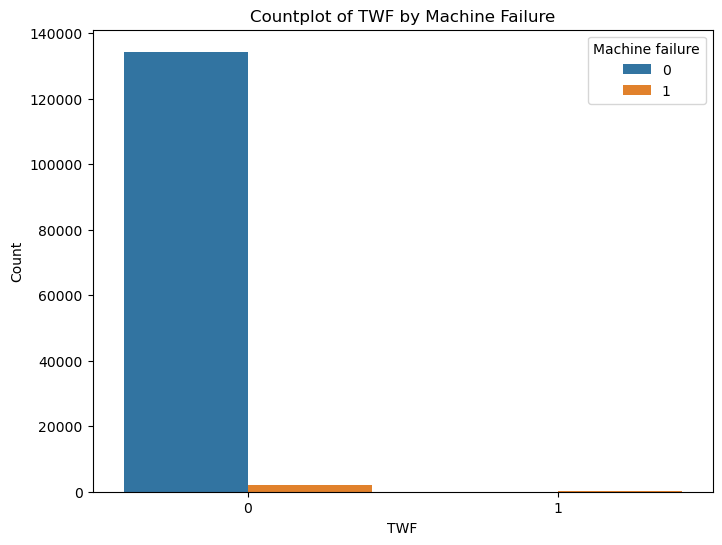

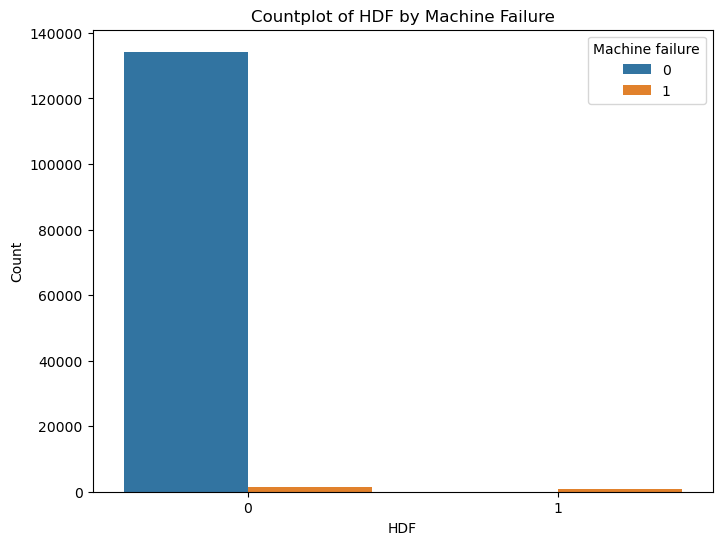

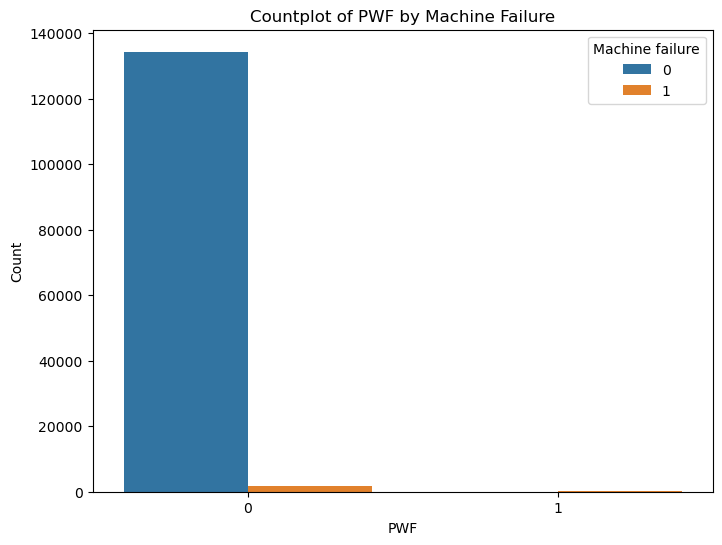

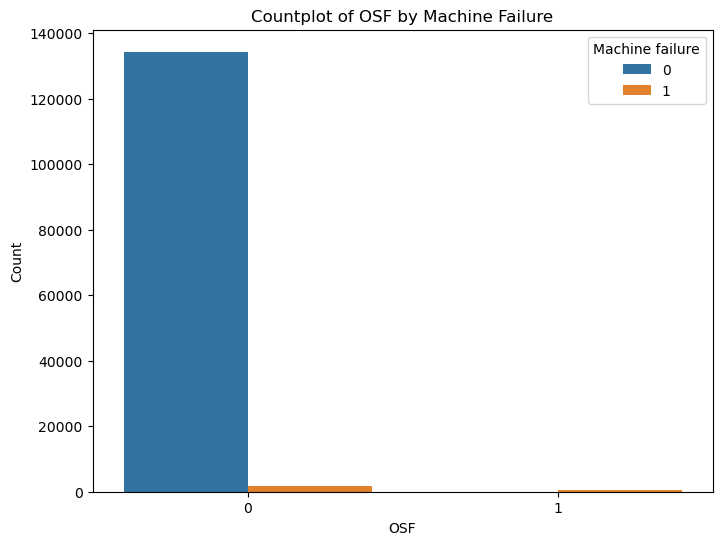

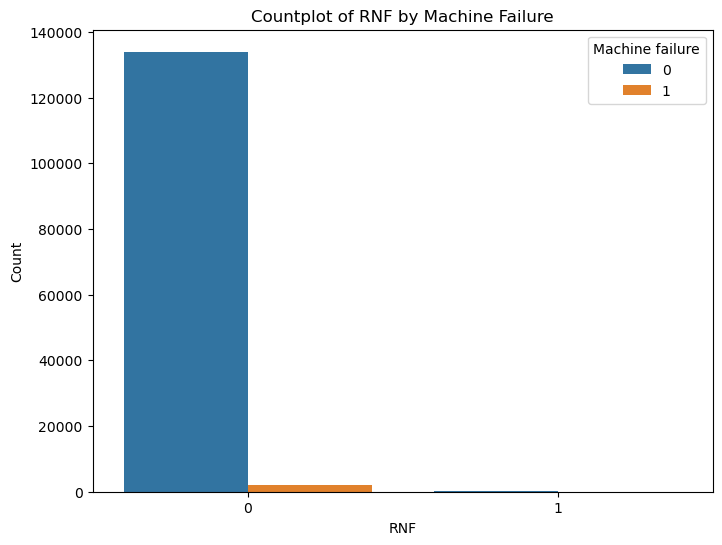

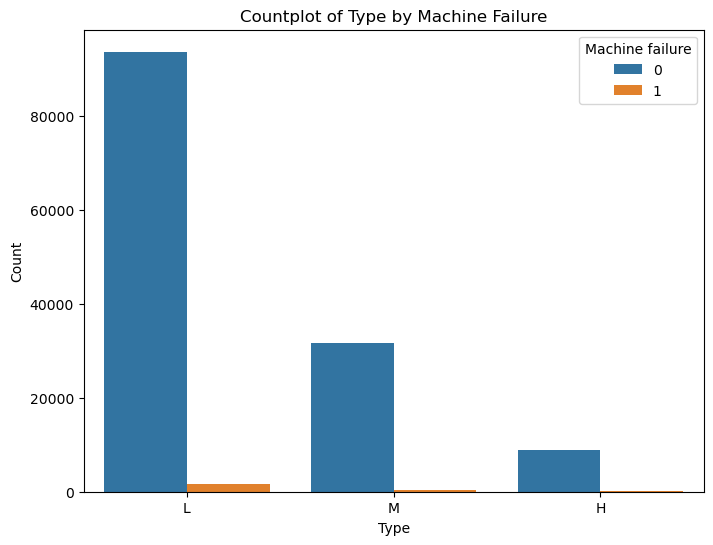

In [16]:
categorical_cols = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x=column, hue='Machine failure')
    plt.title(f'Countplot of {column} by Machine Failure')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Displaying pairplots </div>


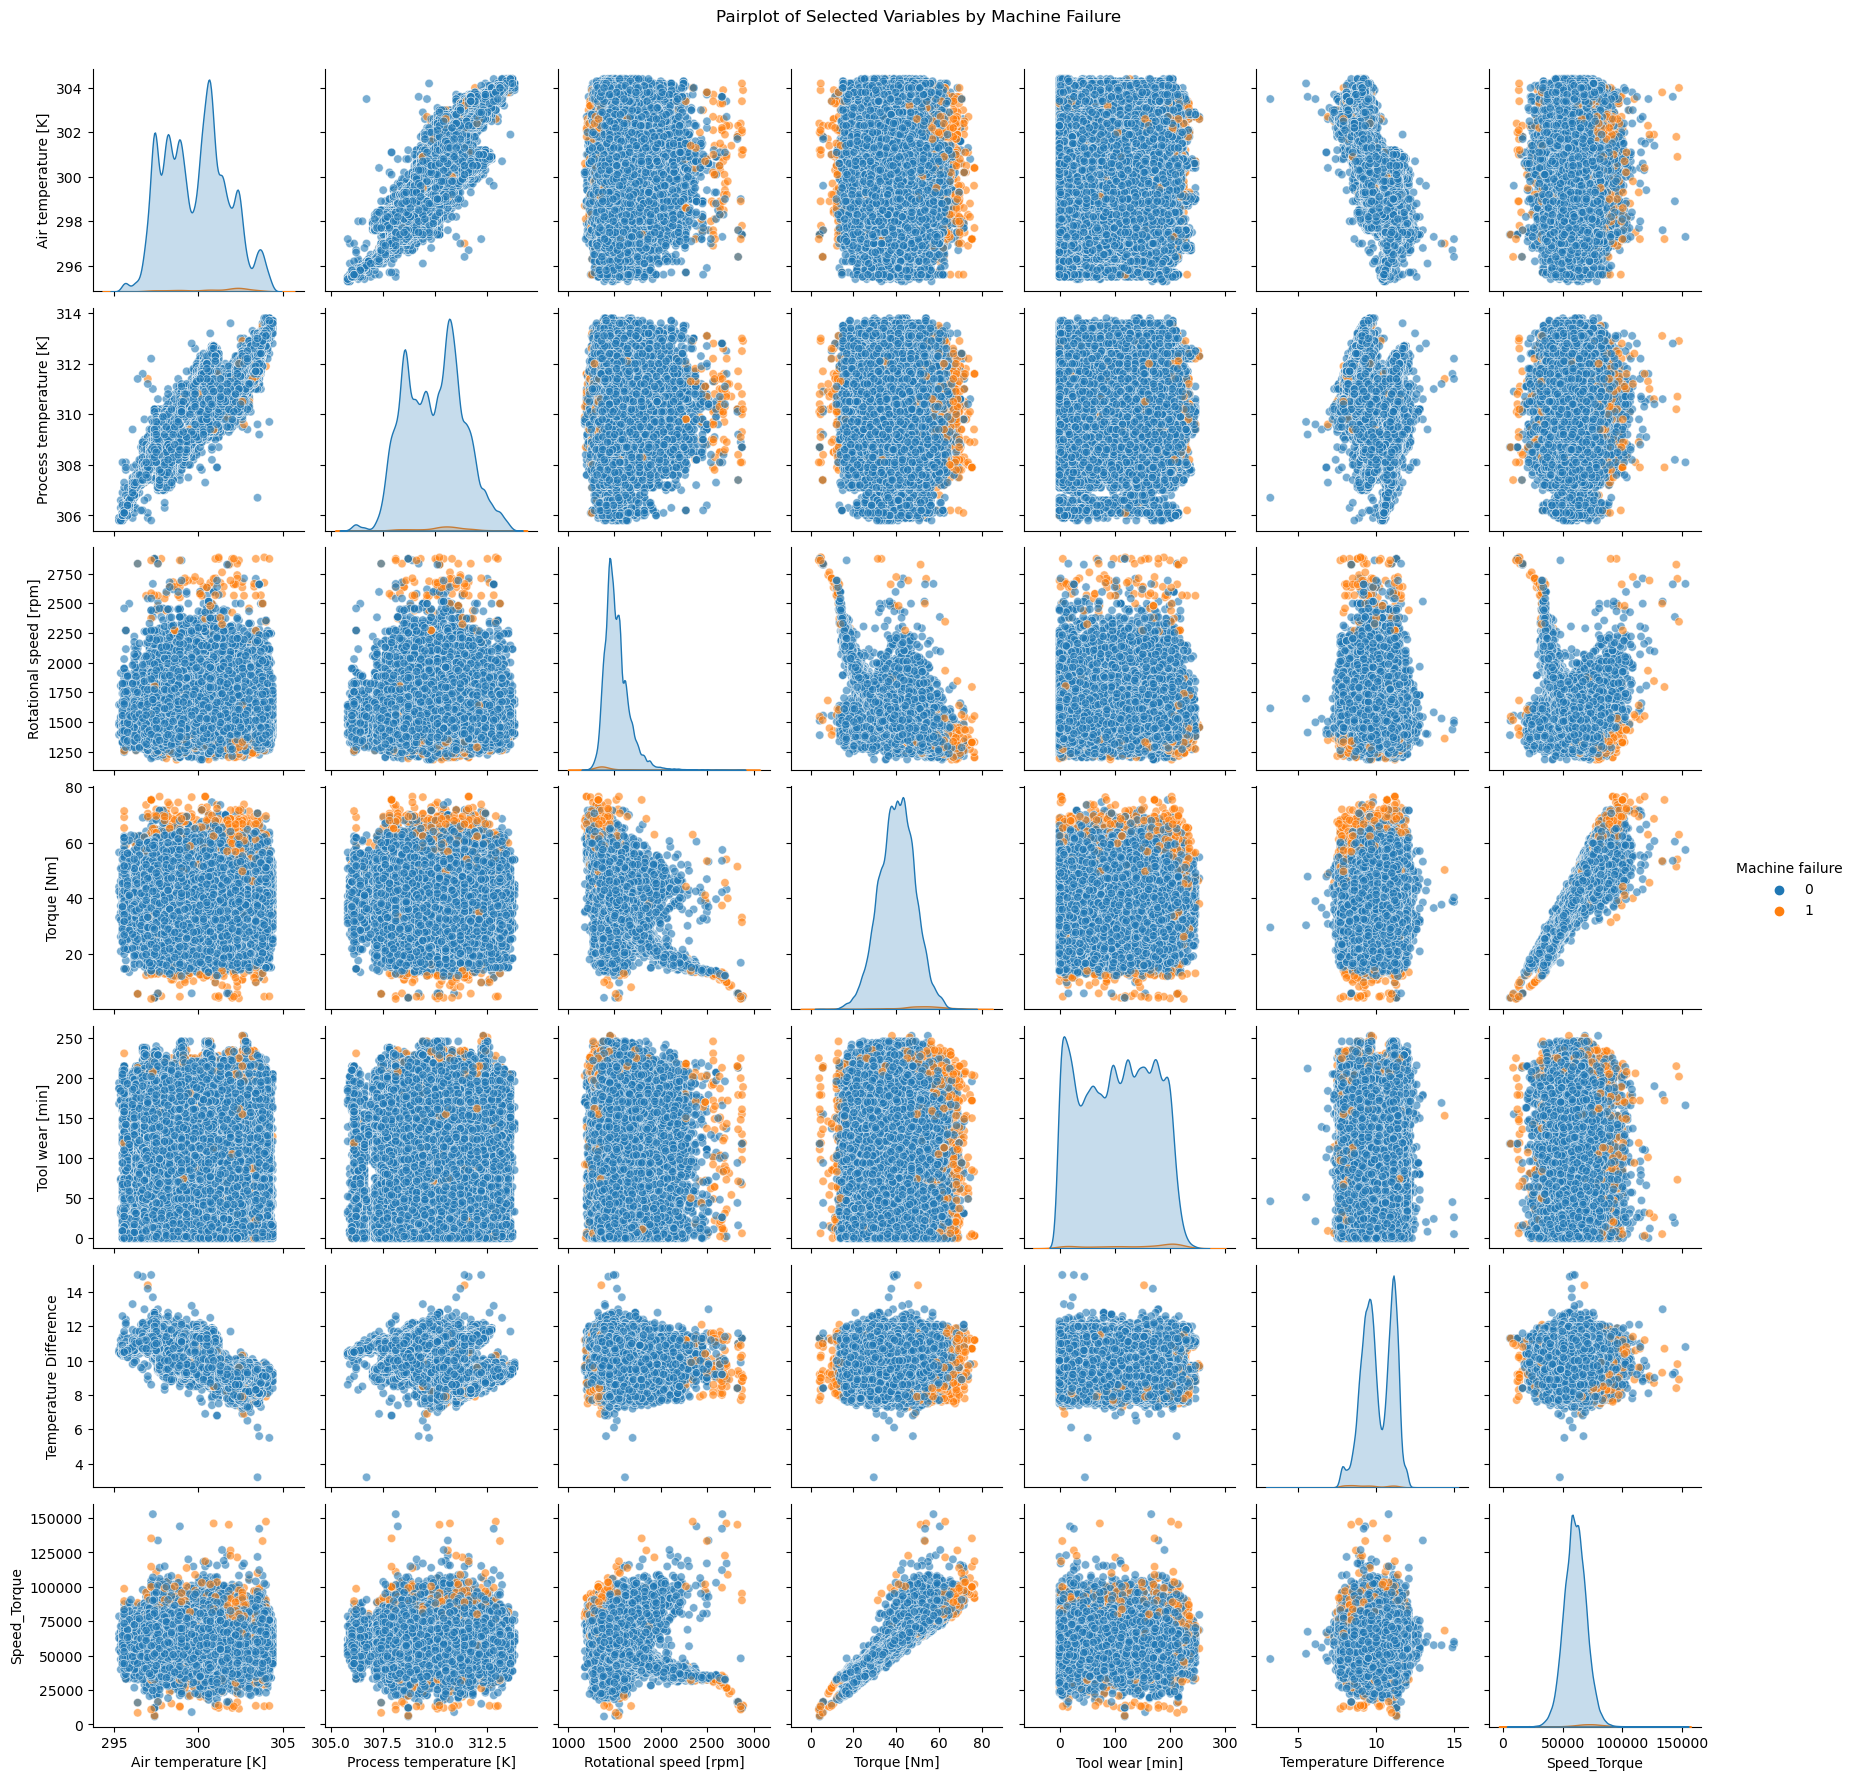

In [17]:
pairplot_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
                 'Tool wear [min]', 'Temperature Difference', 'Speed_Torque']
sns.pairplot(data=subset_df, vars=pairplot_cols, hue='Machine failure', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Selected Variables by Machine Failure', y=1.02)
plt.show()

<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
4. Model Selection </div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Shortlisting the best model whose hyperparameters can be tuned in the next stage. </div>

In [18]:
# Create a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Create a dictionary to map model names to model objects
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False),
    'LGBM': LGBMClassifier(),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier())
}

# Append the names and models for stacking
model_dict['Stacking'] = StackingCVClassifier(classifiers=[model for model_name, model in model_dict.items() if model_name != 'Stacking'],
                                              meta_classifier=LogisticRegression())


In [20]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature Difference', 'Speed_Torque']
categorical_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']


In [21]:
# Create a column transformer to apply different preprocessing steps to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [22]:
# Replace problematic characters in feature names
def clean_feature_names(feature_names):
    clean_names = []
    for name in feature_names:
        name = re.sub(r'[\[\]<>]', '_', name)
        clean_names.append(name)
    return clean_names


In [23]:
feature_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H', 'Type_L', 'Type_M', 'Temperature Difference', 'Speed_Torque']
cleaned_feature_names = clean_feature_names(feature_names)

In [24]:
# Define the number of folds for k-fold cross-validation
n_folds = 5

# Initialize the k-fold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize a list to store the cross-validation scores
cv_scores = []

# Create a list to store the model names and their corresponding ROC AUC scores
model_names = []
roc_auc_scores = []

# Initialize the best model and its score
best_model = None
best_model_score = 0.0

# Loop over the models
for model_name, model in model_dict.items():
    print(f'Running {model_name}...')

    # Reset the mean CV score for each model
    mean_cv_score = 0.0

    # Loop over the folds
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):

        print(f'Fold: {fold+1}')

        # Split the data into training and validation sets for this fold
        X_train_fold = X_train.iloc[train_index]
        X_val_fold = X_train.iloc[val_index]
        y_train_fold = y_train.iloc[train_index]
        y_val_fold = y_train.iloc[val_index]

        # Clean the feature names
        cleaned_feature_names = clean_feature_names(X_train_fold.columns)

        if model_name != 'LGBM':
            # Set the cleaned feature names for the model
            model.feature_names = [str(name) for name in cleaned_feature_names]

        # Apply preprocessing to the training data for this fold
        X_train_fold = preprocessor.fit_transform(X_train_fold)
        X_val_fold = preprocessor.transform(X_val_fold)

        # Fit the model on the training data for this fold
        model.fit(X_train_fold, y_train_fold)

        # Evaluate the model on the validation data for this fold
        y_pred_val = model.predict_proba(X_val_fold)[:, 1]
        roc_auc = roc_auc_score(y_val_fold, y_pred_val)
        cv_scores.append(roc_auc)

        # Print the accuracy for this fold
        accuracy = model.score(X_val_fold, y_val_fold)
        print(f'Fold {fold+1} Accuracy:', accuracy)

    # Calculate the mean cross-validation score for the model
    mean_cv_score = np.mean(cv_scores)
    print('Mean CV score:', mean_cv_score)
    
    # Append the model name and ROC AUC score to the lists
    model_names.append(model_name)
    roc_auc_scores.append(mean_cv_score)

    # Check if this model has the best score
    if mean_cv_score > best_model_score:
        best_model_score = mean_cv_score
        best_model = model

Running Logistic Regression...
Fold: 1


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 1 Accuracy: 0.996518392963489
Fold: 2


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 2 Accuracy: 0.9962435292500802
Fold: 3


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 3 Accuracy: 0.9962435292500802
Fold: 4


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 4 Accuracy: 0.9959226681326736
Fold: 5


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Fold 5 Accuracy: 0.9956477918270111
Mean CV score: 0.9436069764290098
Running Random Forest...
Fold: 1
Fold 1 Accuracy: 0.9962435292500802
Fold: 2
Fold 2 Accuracy: 0.9962435292500802
Fold: 3
Fold 3 Accuracy: 0.9962435292500802
Fold: 4
Fold 4 Accuracy: 0.9959226681326736
Fold: 5
Fold 5 Accuracy: 0.9955561663917903
Mean CV score: 0.9438459384750674
Running XGBoost...
Fold: 1
Fold 1 Accuracy: 0.9961519080122773
Fold: 2
Fold 2 Accuracy: 0.9962893398689816
Fold: 3
Fold 3 Accuracy: 0.9960144761555728
Fold: 4
Fold 4 Accuracy: 0.9957852299798424
Fold: 5
Fold 5 Accuracy: 0.9954187282389592
Mean CV score: 0.9488667295612019
Running AdaBoost...
Fold: 1
Fold 1 Accuracy: 0.996518392963489
Fold: 2
Fold 2 Accuracy: 0.9962893398689816
Fold: 3
Fold 3 Accuracy: 0.9961519080122773
Fold: 4
Fold 4 Accuracy: 0.9958310426974528
Fold: 5
Fold 5 Accuracy: 0.9956477918270111
Mean CV score: 0.9520254058601406
Running Gradient Boosting...
Fold: 1
Fold 1 Accuracy: 0.9964267717256861
Fold: 2
Fold 2 Accuracy: 0.99610

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Fold 1 Accuracy: 0.9958770442988685
Fold: 2


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Fold 2 Accuracy: 0.9961519080122773
Fold: 3


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Fold 3 Accuracy: 0.9958312336799671
Fold: 4


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Fold 4 Accuracy: 0.9956936045446216
Fold: 5


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Fold 5 Accuracy: 0.9948231629100238
Mean CV score: 0.9510651989550176
Running Stacking...
Fold: 1


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be remov

Fold 1 Accuracy: 0.9963809611067845
Fold: 2


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be remov

Fold 2 Accuracy: 0.9961977186311787
Fold: 3


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

Fold 3 Accuracy: 0.9962893398689816
Fold: 4


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be remov

Fold 4 Accuracy: 0.995968480850284
Fold: 5


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
`base_estimator` was renamed to `estimator` in version 1.2 and will be remov

Fold 5 Accuracy: 0.9955561663917903
Mean CV score: 0.9441489285981839


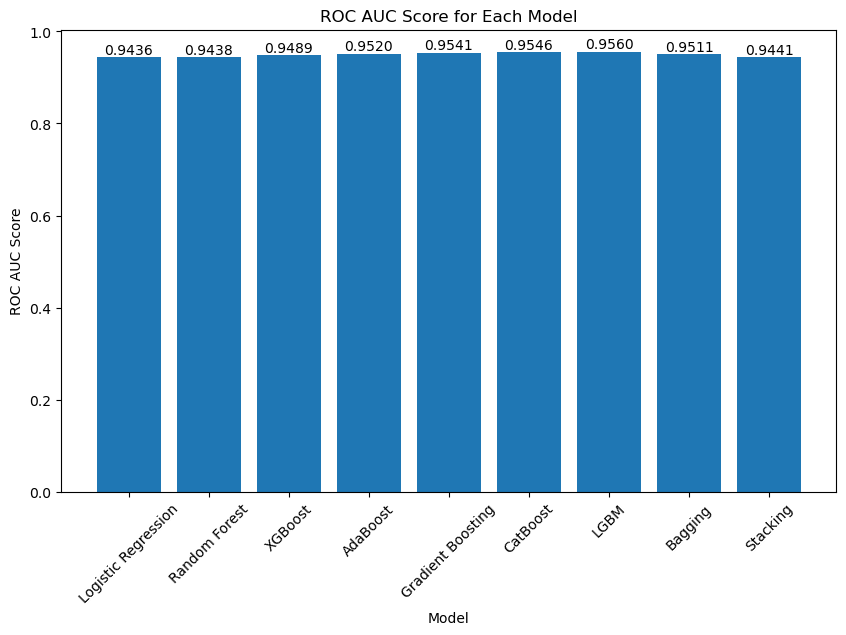

In [25]:
# Plot the ROC AUC scores using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_scores)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Model')

# Display the ROC AUC scores over each bar
for i in range(len(model_names)):
    plt.text(i, roc_auc_scores[i], f'{roc_auc_scores[i]:.4f}', ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

In [26]:
print("Best model is ",best_model)

Best model is  LGBMClassifier()


<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
5. Hyperparameter tuning. </div>

<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
Tuning the best model i.e LGBM </div>

In [27]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}


In [28]:
#preprocessing the train set using preprocessor
preprocessor.fit(X_train)

X_train_preprocessed = preprocessor.transform(X_train)

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Initialize the GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, cv=n_folds, scoring='roc_auc')

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_preprocessed, y_train)

# Get the best estimator and its corresponding score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', best_score)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15, 'reg_alpha': 0.5, 'reg_lambda': 0.0}
Best Score: 0.9664923193210123


<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
6. Feature Importances. </div>

In [29]:
#fetching the feature names after passing through preprocessing pipeline
preprocessed_feature_names = numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
print(len(preprocessed_feature_names))

20


                    Feature  Importance
0           Tool wear [min]         105
1               Torque [Nm]          91
2              Speed_Torque          68
3    Rotational speed [rpm]          63
4       Air temperature [K]          49
5    Temperature Difference          47
6   Process temperature [K]          44
7                     TWF_0          29
8                     OSF_0          29
9                     PWF_0          26
10                    HDF_0          18
11                   Type_L           6
12                   Type_M           5
13                    PWF_1           2
14                    OSF_1           2
15                    HDF_1           1
16                   Type_H           1
17                    TWF_1           0
18                    RNF_0           0
19                    RNF_1           0


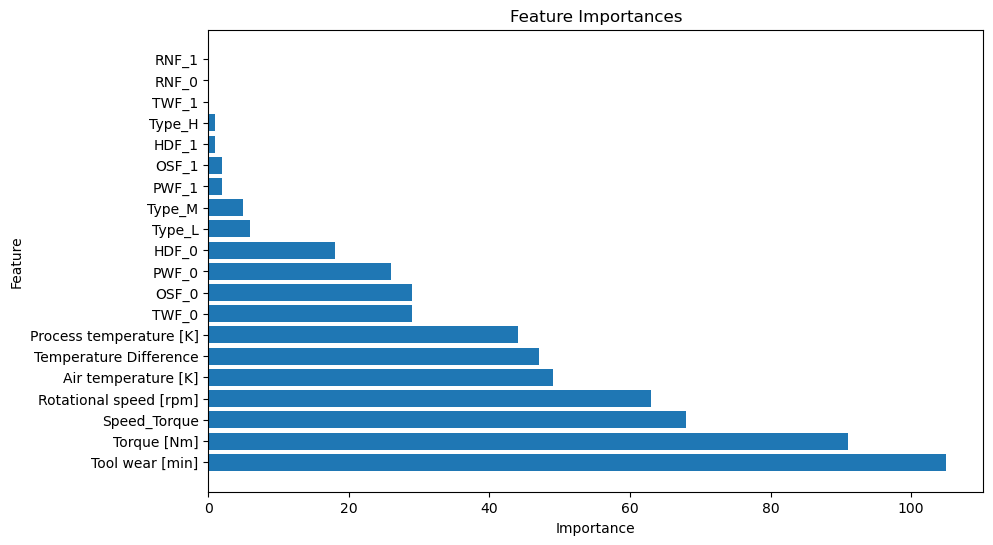

In [30]:
feature_importances = best_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
cleaned_feature_names = numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

sorted_feature_names = [cleaned_feature_names[idx] for idx in sorted_indices]
sorted_feature_importances = feature_importances[sorted_indices]

# Print table of feature importances
feature_importances_table = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_feature_importances
})
print(feature_importances_table)

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
7. Model Interpretation. </div>

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


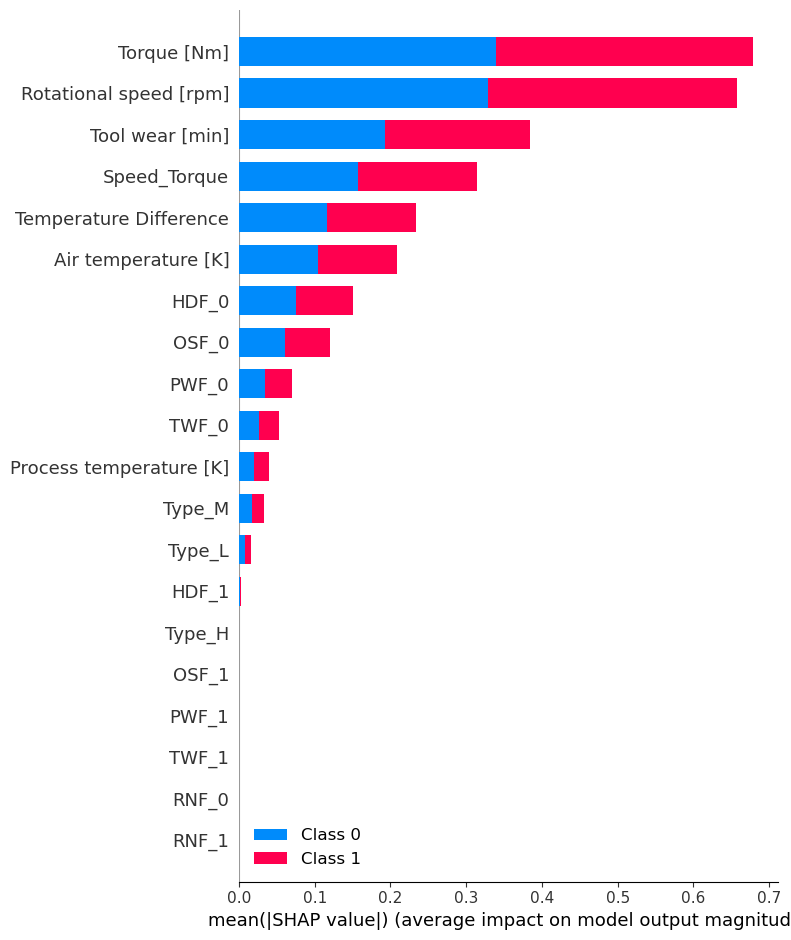

In [31]:
# Calculate SHAP values
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X_train_preprocessed)

# Plot detailed SHAP summary plot
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=cleaned_feature_names, plot_type='bar')


<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
8. Recommendations </div>
<div style="background-color:#DCDCFF; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
The following recommendations for binary categorization of machine failures may be provided based on feature importances and model interpretation:<br>
<br>
1. Rotational speed (rpm): This trait is critical for forecasting machine faults. High rotational speed numbers may imply increased stress on machine components, increasing the chance of failure. Monitoring and adjusting rotational speed within appropriate ranges can aid in failure prevention.<br>
<br>
2. Torque (Nm): Torque imparted to machine components is a significant aspect in failure prediction. High torque levels can cause component strain and increase the likelihood of failure. Keeping the torque within acceptable ranges and avoiding high loads might assist to reduce failures.<br>
<br>    
3. Minimum tool wear: It is critical to monitor and manage tool wear in order to avoid machine problems. High tool wear can result in lower performance and failures. Regular maintenance, periodic tool replacements, and wear level monitoring can all assist to reduce failures.<br>
<br>
4. Temperature Difference: The difference in temperature within the equipment might offer information about its working circumstances. Large temperature differences may indicate ineffective heat dissipation or other problems, increasing the likelihood of failure. Preventing breakdowns can be aided by maintaining suitable cooling systems and monitoring temperature differentials.<br>
<br>
5. Torque_Speed: The combined influence of speed and torque on machine performance is critical for failure prediction. High amounts of speed and torque combined can put strain on machine components, potentially leading to failure. Controlling speed and torque within acceptable limits is critical for lowering the risk of failure.<br>
<br>
6. Air temperature in Kelvin (K): Monitoring the temperature of the air within the machine environment can offer information about potential failure hazards. Extreme temperatures, whether too hot or too cold, can impair machine operation and increase the probability of failure. Maintaining proper operating temperatures is critical for avoiding problems.<br>
<br>
It is recommended to closely monitor and adjust rotational speed, torque, tool wear, temperature differential, speed-torque interaction, and air temperature based on these guidelines. Paying attention to additional factors such as operating conditions (OSF), tool/workpiece cooling (TWF and PWF), and hydraulic system conditions (HDF) can also help to reduce machine failures.<br>
<br>
</div>

<div style="background-color:#C5C5FF; color:#19180F; font-size:20px; font-family:Verdana; padding:10px; border: 5px solid #19180F;border-radius: 10px"> 
9. Generating Submission</div>

In [32]:
#defining the preprocessor
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature Difference', 'Speed_Torque']
categorical_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [33]:
#passing the test_df through preprocessor
X_test = preprocessor.fit_transform(test_df)
X_test = preprocessor.transform(test_df)

In [34]:
# Make predictions using the best model
predictions = best_model.predict_proba(X_test)[:, 1]


In [35]:
#fetching the IDs and writing to dict
test_data = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')
submission_data = pd.DataFrame({
    'id': test_data['id'],
    'Machine failure': predictions
})

In [36]:
#generating submission
submission_data.to_csv('submission.csv', index=False)